In [2]:
import os, sys
import glob
import tqdm
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import torch

In [28]:
sys.path.insert(0,'/Users/mustafa/Desktop/GitHub//src')
from dataset import 

In [4]:
df = pd.read_csv('../../SkinCancer/data/new_meta.csv')
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,image_path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../data/HAM10k/HAM10000_images/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../data/HAM10k/HAM10000_images/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../data/HAM10k/HAM10000_images/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../data/HAM10k/HAM10000_images/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../data/HAM10k/HAM10000_images/ISIC_0031633.jpg


In [46]:
classes = ['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec']
images = []
for c in classes:
    
    path = df[df['dx']==c]['image_path'].iloc[0].split('..')[1]
    path = path_adj + path
    
    images.append(path)

In [40]:



df[df['dx']=='nv']['image_path'].iloc[0]

'../data/HAM10k/HAM10000_images/ISIC_0024698.jpg'

In [14]:
n = df['image_path'].iloc[0].split('..')[1]

In [ ]:
classes = ['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec']
# ['akiec' 'bcc' 'bkl' 'df' 'mel' 'nv' 'vasc']

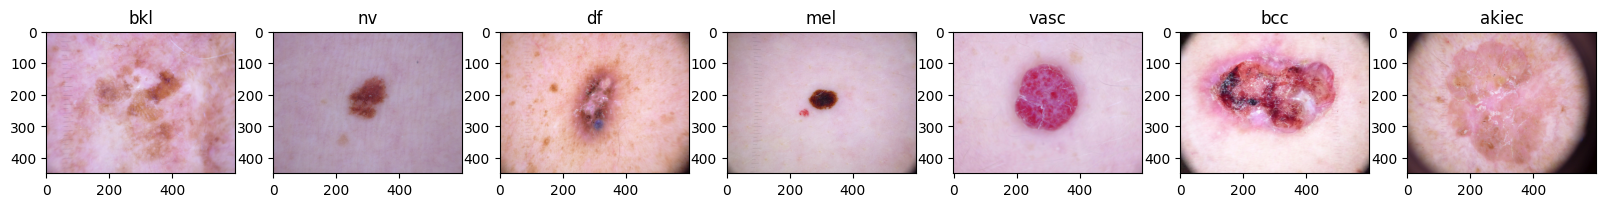

In [65]:
f, axs = plt.subplots(1, 7, figsize=(20, 12))
axs = axs.flatten()
images_i = [Image.open(p) for p in images]
for i, (img, ax) in enumerate(zip(images_i, axs)):
    # img = Image.open(c)
    ax.imshow(img)
    t = classes[i]
    ax.title.set_text(t)
plt.show()

In [66]:
f.savefig('../images/dataset_sample.png')

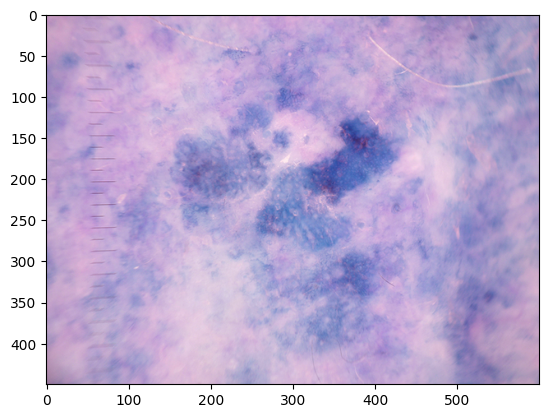

In [38]:
plt.imshow(cv2.imread(x,cv2.COLOR_BGR2RGB))

In [24]:
path_adj = '../../SkinCancer'

In [ ]:
y = df['dx'].to_numpy()

In [24]:
class_weights=class_weight.compute_class_weight('balanced',classes=np.unique(ds.classes),y=np.array(ds.classes_all))
class_weights=torch.tensor(class_weights,dtype=torch.float)

In [14]:
df_minority = df[df['dx']!='nv']

In [16]:
df_minority['dx'].value_counts()

mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [30]:
dftrain = pd.read_csv('../data/augment2_train.csv')
dftest = pd.read_csv('../data/augment2_test.csv')

In [31]:
dftrain

,lesion_id,image_id,dx,dx_type,age,sex,localization,image_path
0,HAM_0004756,ISIC_0030442_1,df,histo,55.0,male,lower extremity,../data/Augmented_rename/ISIC_0030442_1.jpg
1,HAM_0005989,ISIC_0033123_41,vasc,histo,25.0,female,back,../data/Augmented_rename/ISIC_0033123_41.jpg
2,HAM_0007225,ISIC_0031429_34,df,histo,75.0,male,lower extremity,../data/Augmented_rename/ISIC_0031429_34.jpg
3,HAM_0007410,ISIC_0031457_47,df,histo,65.0,male,foot,../data/Augmented_rename/ISIC_0031457_47.jpg
4,HAM_0002639,ISIC_0025249_24,vasc,consensus,30.0,female,lower extremity,../data/Augmented_rename/ISIC_0025249_24.jpg
...,...,...,...,...,...,...,...,...
34898,HAM_0004984,ISIC_0032879_1,mel,histo,80.0,male,face,../data/Augmented_rename/ISIC_0032879_1.jpg
34899,HAM_0001852,ISIC_0033749_0,vasc,histo,80.0,male,lower extremity,../data/Augmented_rename/ISIC_0033749_0.jpg
34900,HAM_0001616,ISIC_0029669_7,bcc,histo,65.0,female,back,../data/Augmented_rename/ISIC_0029669_7.jpg
34901,HAM_0000940,ISIC_0033608_36,vasc,histo,35.0,female,lower extremity,../data/Augmented_rename/ISIC_0033608_36.jpg


In [33]:
dftest[dftest['dx']=='nv']

,lesion_id,image_id,dx,dx_type,age,sex,localization,image_path
12,HAM_0003767,ISIC_0024604,nv,histo,60.0,male,upper extremity,../data/HAM10k/HAM10000_images/ISIC_0024604.jpg
18,HAM_0000366,ISIC_0027147,nv,histo,75.0,male,back,../data/HAM10k/HAM10000_images/ISIC_0027147.jpg
20,HAM_0001112,ISIC_0024359,nv,follow_up,40.0,male,back,../data/HAM10k/HAM10000_images/ISIC_0024359.jpg
24,HAM_0003836,ISIC_0031802,nv,histo,55.0,male,unknown,../data/HAM10k/HAM10000_images/ISIC_0031802.jpg
26,HAM_0001398,ISIC_0027934,nv,follow_up,65.0,female,back,../data/HAM10k/HAM10000_images/ISIC_0027934.jpg
...,...,...,...,...,...,...,...,...
8691,HAM_0004066,ISIC_0026390,nv,follow_up,30.0,female,back,../data/HAM10k/HAM10000_images/ISIC_0026390.jpg
8693,HAM_0005143,ISIC_0030303,nv,histo,40.0,male,chest,../data/HAM10k/HAM10000_images/ISIC_0030303.jpg
8695,HAM_0007295,ISIC_0031380,nv,histo,60.0,female,chest,../data/HAM10k/HAM10000_images/ISIC_0031380.jpg
8702,HAM_0004149,ISIC_0033880,nv,histo,45.0,female,foot,../data/HAM10k/HAM10000_images/ISIC_0033880.jpg


In [89]:

def plot_samples(df):
    classes = df['dx'].value_counts().keys().to_list()
    r = c = len(classes)
    plt.figure(figsize=(10,10)) # specifying the overall grid size
    
    for cl in classes:
        for i in range(r*c):
        
            
            img_path = df[df['dx']==cl].iloc[i,-1]
            # img_path = [df.iloc[i,-1] if df.iloc[i,2] == str(c)]
            # print(c, img_path)
            plt.subplot(r,c,i+1)    # the number of images in the grid is 5*5 (25)
        # img_path = df.iloc[i,-1] for 
        
            plt.imshow(cv2.imread(img_path))
            plt.title(str(cl))


            plt.show()